###**LOAN PREDICTION**

This project aims to shed insight into the pivotal inputs that help determine the success of loan
applications, empowering both individuals and businesses to leverage these data-driven findings
in the loan approval process.

Project team members:

Alex Prakke - jxp9923

Ananya Mittal - am12523

##DATA READING

In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as skp
from scipy import stats

#Retrieving data and displaying the first five rows to understand the layout of the dataset
url = "https://raw.githubusercontent.com/am12523/loan_approval_project/main/loan_approval_dataset.csv"
df = pd.read_csv(url) #Change the url above to "loan_approval_dataset.csv" at the end
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


##PRE-PROCESSING

In [ ]:
#Dropping inessential columns and rows with NaN values to clean the dataset
del df['loan_id']
df.dropna(inplace=True)

In [ ]:
#Noticed that the column names had whitespaces --> using strip to clean up the column names
df.columns = df.columns.str.strip()

In [ ]:
#Creating a new column with the total assets indicated in every loan application
df['total_assets_value'] = df['residential_assets_value'] + df['commercial_assets_value'] + df['luxury_assets_value'] + df['bank_asset_value']

In [ ]:
#Standardizing larger numerical data for consistency
dataStd = df[['income_annum','loan_amount', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'total_assets_value','no_of_dependents', 'cibil_score']]
x = dataStd.values
x_scaled = skp.StandardScaler().fit_transform(x)
dataStd = pd.DataFrame(x_scaled)
df[['income_annum_std','loan_amount_std', 'residential_assets_value_std', 'commercial_assets_value_std', 'luxury_assets_value_std', 'bank_asset_value_std', 'total_assets_value_std','no_of_dependents_std', 'cibil_score_std']] = dataStd[[0,1,2,3,4,5,6,7,8]]
df.head()


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,...,total_assets_value,income_annum_std,loan_amount_std,residential_assets_value_std,commercial_assets_value_std,luxury_assets_value_std,bank_asset_value_std,total_assets_value_std,no_of_dependents_std,cibil_score_std
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,...,50700000,1.617979,1.633052,-0.780058,2.877289,0.832028,0.930304,0.930628,-0.294102,1.032792
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,...,17000000,-0.341750,-0.324414,-0.733924,-0.631921,-0.694993,-0.515936,-0.797198,-1.473548,-1.061051
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,...,57700000,1.439822,1.610933,-0.057300,-0.107818,1.996520,2.407316,1.289524,0.295621,-0.544840
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,...,52700000,1.119139,1.721525,1.649637,-0.381263,0.897943,0.899533,1.033170,0.295621,-0.771045
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,...,55000000,1.689242,1.002681,0.757724,0.735304,1.568075,0.007172,1.151093,1.475067,-1.264055


In [ ]:
#Label encoding for categorical data

df['loan_status_num'] = df['loan_status'].map({' Approved': 1, ' Rejected': 0})
df['self_employed_num'] = df['self_employed'].map({' Yes': 1, ' No': 0})
df['education_num'] = df['education'].map({' Graduate': 1, ' Not Graduate': 0})

df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,...,residential_assets_value_std,commercial_assets_value_std,luxury_assets_value_std,bank_asset_value_std,total_assets_value_std,no_of_dependents_std,cibil_score_std,loan_status_num,self_employed_num,education_num
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,...,-0.780058,2.877289,0.832028,0.930304,0.930628,-0.294102,1.032792,1,0,1
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,...,-0.733924,-0.631921,-0.694993,-0.515936,-0.797198,-1.473548,-1.061051,0,1,0
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,...,-0.057300,-0.107818,1.996520,2.407316,1.289524,0.295621,-0.544840,0,0,1
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,...,1.649637,-0.381263,0.897943,0.899533,1.033170,0.295621,-0.771045,0,0,1
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,...,0.757724,0.735304,1.568075,0.007172,1.151093,1.475067,-1.264055,0,1,0


In [ ]:
#Binning cibil score (poor, fair, good, excellent) to improve interpretability
df['cibil_score_category']=skp.KBinsDiscretizer(n_bins=4, encode='ordinal').fit_transform(df['cibil_score'].values.reshape(-1,1))

df['cibil_score_category'].replace(0, 'poor' , inplace=True)
df['cibil_score_category'].replace(1, 'fair' , inplace=True)
df['cibil_score_category'].replace(2, 'good' , inplace=True)
df['cibil_score_category'].replace(3, 'excellent' , inplace=True)

df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,...,commercial_assets_value_std,luxury_assets_value_std,bank_asset_value_std,total_assets_value_std,no_of_dependents_std,cibil_score_std,loan_status_num,self_employed_num,education_num,cibil_score_category
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,...,2.877289,0.832028,0.930304,0.930628,-0.294102,1.032792,1,0,1,excellent
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,...,-0.631921,-0.694993,-0.515936,-0.797198,-1.473548,-1.061051,0,1,0,poor
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,...,-0.107818,1.996520,2.407316,1.289524,0.295621,-0.544840,0,0,1,fair
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,...,-0.381263,0.897943,0.899533,1.033170,0.295621,-0.771045,0,0,1,fair
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,...,0.735304,1.568075,0.007172,1.151093,1.475067,-1.264055,0,1,0,poor


##DATA EXPLORATION

In [ ]:
# 1. Descriptive Statistics
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,total_assets_value,...,residential_assets_value_std,commercial_assets_value_std,luxury_assets_value_std,bank_asset_value_std,total_assets_value_std,no_of_dependents_std,cibil_score_std,loan_status_num,self_employed_num,education_num
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,...,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4269.000000
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,3.254877e+07,...,3.828176e-17,-1.664424e-18,-5.908706e-17,4.993273e-17,8.322122e-19,4.993273e-17,2.629790e-16,0.622160,0.503631,0.502225
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,1.950656e+07,...,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,1.000117e+00,0.484904,0.500045,0.500054
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,4.000000e+05,...,-1.164503e+00,-1.133237e+00,-1.628783e+00,-1.531382e+00,-1.648293e+00,-1.473548e+00,-1.739665e+00,0.000000,0.000000,0.000000
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,1.630000e+07,...,-8.108132e-01,-8.370048e-01,-8.378082e-01,-8.236472e-01,-8.330875e-01,-8.838247e-01,-8.522468e-01,0.000000,0.000000,0.000000
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,3.150000e+07,...,-2.879675e-01,-2.901149e-01,-5.781874e-02,-1.159123e-01,-5.377129e-02,2.956212e-01,3.709143e-04,1.000000,1.000000,1.000000
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,4.720000e+07,...,5.885679e-01,5.985812e-01,7.221707e-01,6.533647e-01,7.511803e-01,8.853442e-01,8.587888e-01,1.000000,1.000000,1.000000
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,9.070000e+07,...,3.325819e+00,3.287456e+00,2.644680e+00,2.991967e+00,2.981460e+00,1.475067e+00,1.740407e+00,1.000000,1.000000,1.000000


Insights:
1. Number of dependents: The distribution appears to be fairly symmetric with the mean number of dependents at 2.5 and the median at 3.
2. Annual Income: The annual income ranges from 200,000 to 9.9 million, indicating a large variation in the dataset. The mean income is around 5.06 million.
3. The average loan amount is approximately 15.13 million, with a standard deviation of about 9.04 million, noticably greater than the average annual income and almost half of the average total asset value.
4. Loan term: Calculating the interquartile range (75%-25%) we can deduce that most loans in the dataset have terms ranging from 6 to 16 years, with the smallest loan term being 2 years.
5. Cibil score: The distribution for cibil scores is very symmetrical with a mean of 599.9 and a median of 600. Furthermore, roughly only 25% of the dataset population has excellent cibil scores (750 and up).
6. Asset values: All specfic asset values have different means and distributions, but from total asset value we can see that there is large variability in the datasets as indicated by the large standard deviation.

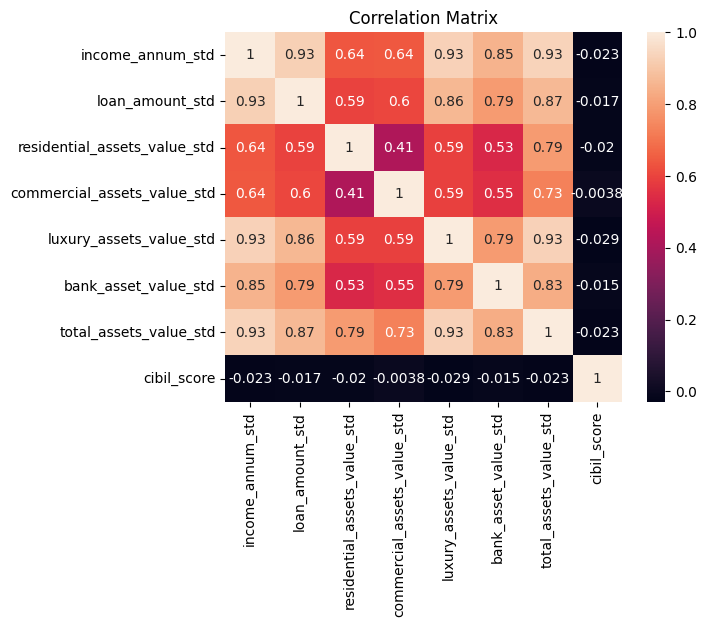

In [ ]:
# 2. Correlation Statistics for continuous data
corr_cols = ['income_annum_std','loan_amount_std','residential_assets_value_std','commercial_assets_value_std','luxury_assets_value_std','bank_asset_value_std','total_assets_value_std', 'cibil_score']
corr_matrix = df[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


Insights:
1. Cibil scores have almost no relation with any of the other continous variables, which aligns logically with the fact that cibil scores only indicate credit history.
2. The values of different assets (residential, commercial, luxury, and bank assets) have a weak to moderate positive linear relationship between them (with correlation coefficients being in the range of 0.4-0.6). However, interestingly, luxury assets and bank assets have a fairly strong relationship with a coefficient of 0.8.
3. Out of all the assets, the value of luxury assets seems to have the biggest influence and has the strongest relationship with annual income (0.93), the value of total assets (0.93) and loan amount (0.86).
4. Loan amounts seem to have the strongest linear relationship with annual income, total assets, and luxury assets in particular (though it has moderate to strong relationships with all the continous variables).

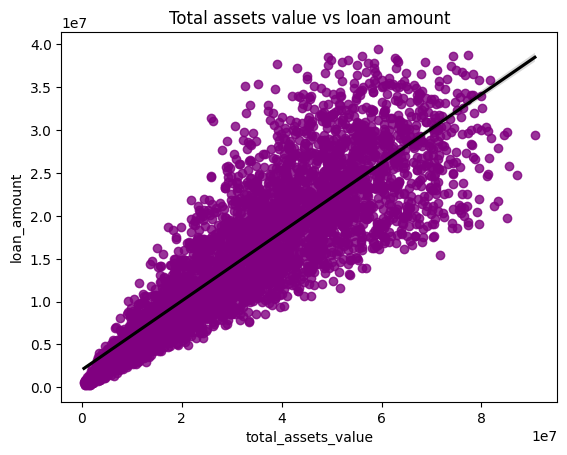

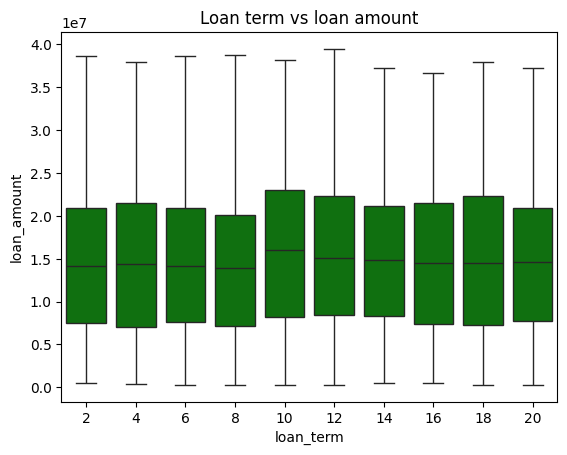

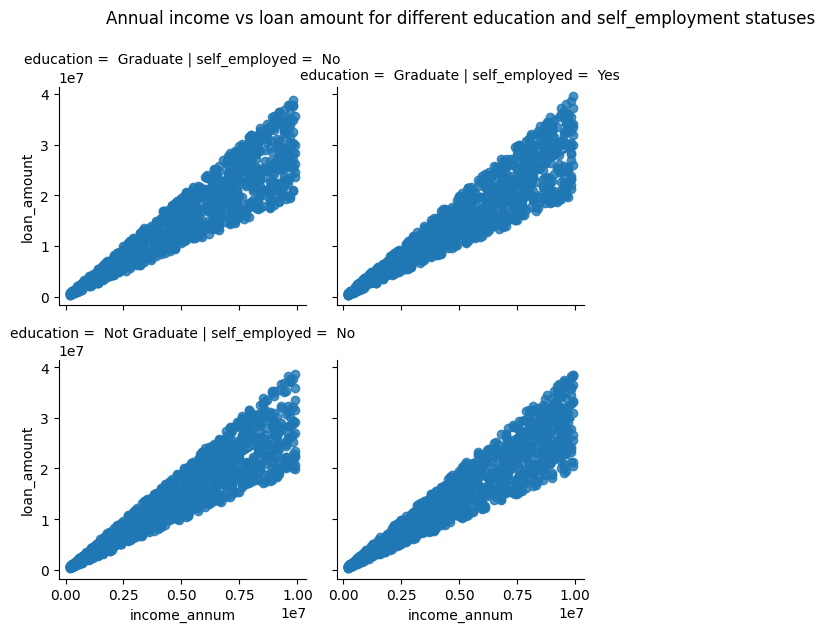

In [ ]:
#3. Visualizations including regression plots, boxplots and FacetGrid to further understand the correlation coefficients found
sns.regplot(data=df, x='total_assets_value', y='loan_amount', color = 'purple', line_kws={"color":"black"})
plt.title("Total assets value vs loan amount")
plt.show()
sns.boxplot(data=df, x='loan_term', y='loan_amount', color = 'green')
plt.title ("Loan term vs loan amount")
plt.show()
sns.FacetGrid(data=df, col='self_employed', row='education').map(sns.regplot, 'income_annum', 'loan_amount')
plt.title("Annual income vs loan amount for different education and self_employment statuses",y = 2.5)
plt.show()

Insights:
1. Loan amount has a strong linear relationship with annual income and total assets value (stronger relationship with annual income) which does not seem to differ much by education or self employment
2. Loan applications with different loan terms seem to have similar average loan amounts and range, though applications with 10 year loan terms have a slightly higher mean loan amount and applications with 12 year loan terms have the largest range.

Recommendations:
1. When assessing the wealth of loan applicants, the value of luxury assets could be given a higher prioritiy as the strongest indicator of someone's wealth
2. Loan products and instruments could be segmented in terms of loan offerings and loan terms to cater to different income and wealth groups since applicants with higher income and wealth tend to apply for bigger loans as seen by the strong correlation.


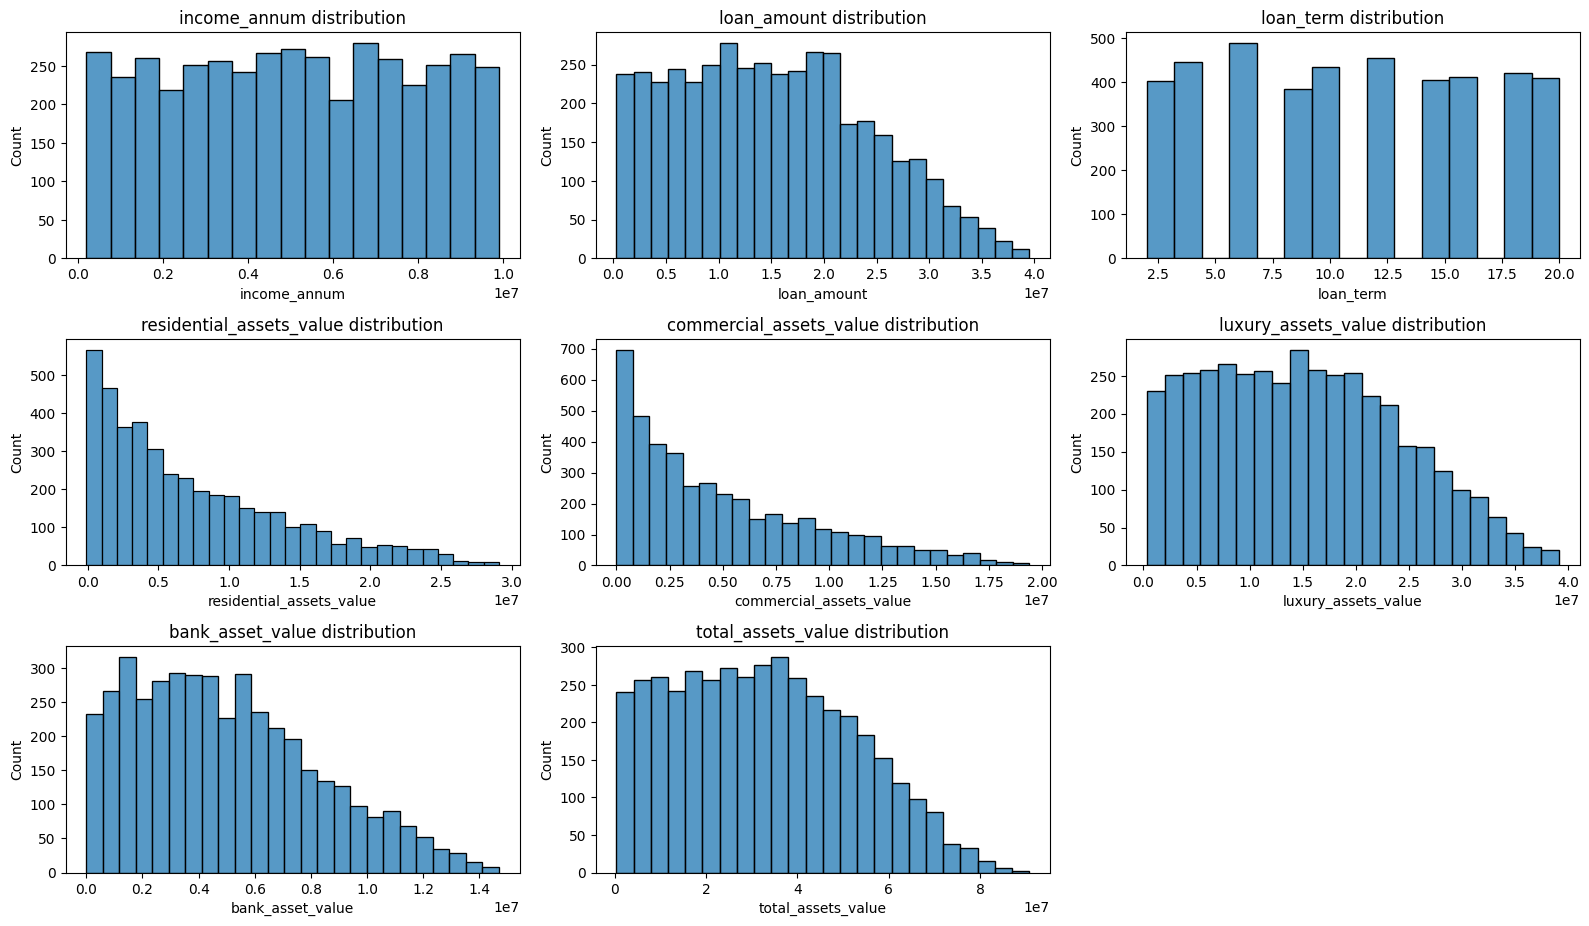

In [ ]:
# 4. Distribution Analysis for continuous data
numerical_vars = ['income_annum', 'loan_amount', 'loan_term',
                  'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value',
                  'bank_asset_value', 'total_assets_value']
plt.figure(figsize=(16, 12))
i =1
for var in numerical_vars:
  plt.subplot(4,3,i)
  sns.histplot(df[var])
  plt.title(var + ' distribution')
  i+=1
plt.tight_layout()
plt.show()


Insights:
1. The distributions of residential assets values and commerical assets values are almost identical in having a logarithmic distribution.
2. The distributions of loan amounts, total assets values and luxury assets value have similar distributions with the highest concentrationa and counts near the means of the distributions (normal distribution)
3. The distribution of annual income is varied and is almost a uniform distribution

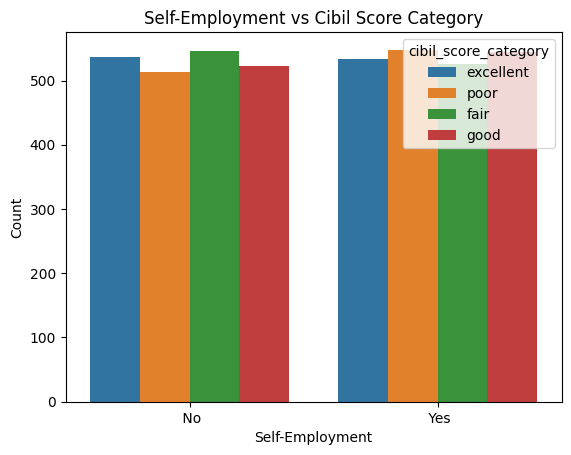

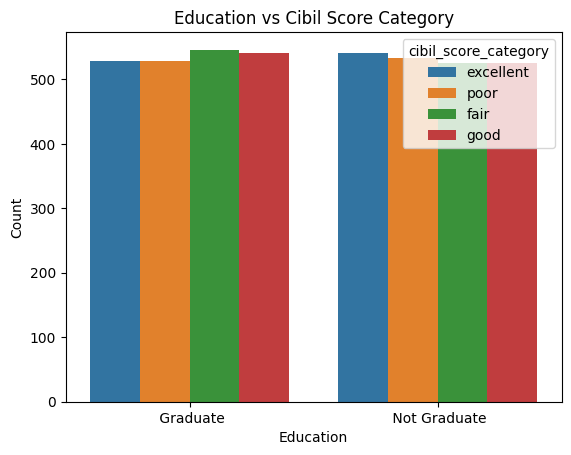

In [ ]:
# 5. Categorical Variable Analysis

sns.countplot(x='self_employed', hue='cibil_score_category', data=df)
plt.title('Self-Employment vs Cibil Score Category')
plt.xlabel('Self-Employment')
plt.ylabel('Count')
plt.show()
sns.countplot(x='education', hue='cibil_score_category', data=df)
plt.title('Education vs Cibil Score Category')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()


In [ ]:
#Using two samples t-test to see if self employment status and education status has any relationship with annual income, value of total assets, and loan amount

#Testing education
print("Education:")
graduate_data = df[df['education'] == ' Graduate']
not_graduate_data = df[df['education'] == ' Not Graduate']

# t-test for income_annum
income_ttest = stats.ttest_ind(graduate_data['income_annum'], not_graduate_data['income_annum'], equal_var=True)
print("T-test result for income_annum:", income_ttest)

# t-test for loan_amount
loan_ttest = stats.ttest_ind(graduate_data['loan_amount'], not_graduate_data['loan_amount'], equal_var=True)
print("T-test result for loan_amount:", loan_ttest)

# t-test for total_assets_value
loan_ttest = stats.ttest_ind(graduate_data['total_assets_value'], not_graduate_data['total_assets_value'], equal_var=True)
print("T-test result for total assets value:", loan_ttest)

print()
print("Self Employment:")

#Testing self employment
self_employed_data = df[df['self_employed'] == ' Yes']
not_self_employed_data = df[df['self_employed'] == ' No']


# t-test for income_annum
income_ttest = stats.ttest_ind(self_employed_data['income_annum'], not_self_employed_data['income_annum'], equal_var=True)
print("T-test result for income_annum:", income_ttest)

# t-test for loan_amount
loan_ttest = stats.ttest_ind(self_employed_data['loan_amount'], not_self_employed_data['loan_amount'], equal_var=True)
print("T-test result for loan_amount:", loan_ttest)

# t-test for total_assets_value
loan_ttest = stats.ttest_ind(self_employed_data['total_assets_value'], not_self_employed_data['total_assets_value'], equal_var=True)
print("T-test result for total assets value:", loan_ttest)


Education:
T-test result for income_annum: TtestResult(statistic=0.759417069369384, pvalue=0.4476450564263351, df=4267.0)
T-test result for loan_amount: TtestResult(statistic=0.6944718409746543, pvalue=0.48742416335276817, df=4267.0)
T-test result for total assets value: TtestResult(statistic=0.6214334841832729, pvalue=0.5343476433048852, df=4267.0)

Self Employment:
T-test result for income_annum: TtestResult(statistic=0.1546667331343113, pvalue=0.877091372444764, df=4267.0)
T-test result for loan_amount: TtestResult(statistic=0.09470420192590415, pvalue=0.9245542270917398, df=4267.0)
T-test result for total assets value: TtestResult(statistic=0.0014813141705566802, pvalue=0.9988181519714869, df=4267.0)


Insights:
1. Countplots: Overall the countplots shows almost uniform distributions because of similar frequencies. However, we can see that self_employed applicants tend to have more poor and good cibil scores while non_self_employed applicants tend to have more fair and excellent cibi scores. However, this does not give us any clear pattern.

2. Two samples t-test: the low T-statistics and high p-values obtained from the t-tests show minimal difference between the means of the different education and self_employment groups regarding loan amounts and annual incomes.

Overall insights and recommendations: Education and self employment status can be considered weaker factors in influencing aspects of a loan application and its approval.

##ANALYSIS AND VISUALIZATION

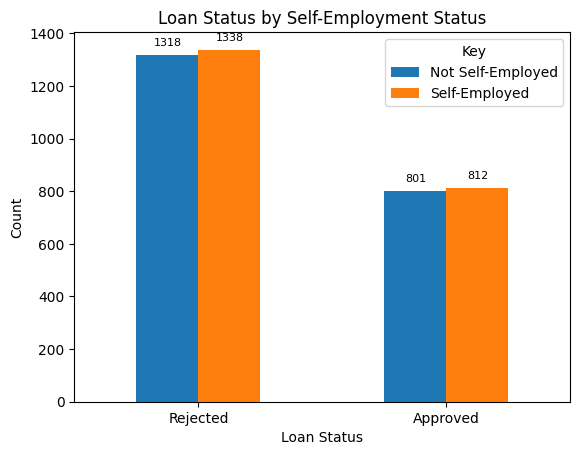

Self-Employed:
Yes: 2150
No: 2119


In [ ]:
# Visualizing the data by loan status and self-employed status
grouped_data = df.groupby(['loan_status', 'self_employed']).size().unstack()
ax = grouped_data.plot(kind='bar', stacked=False)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status by Self-Employment Status')
plt.xticks(ticks=[0, 1], labels=['Rejected', 'Approved'], rotation=0)
for i, p in enumerate(ax.patches):
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(str(int(y)), (x, y), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=8)
plt.legend(title='Key', labels=['Not Self-Employed', 'Self-Employed'])
plt.show()

#seeing how many people are self employed vs not
self_employed_counts = df['self_employed'].value_counts()
print("Self-Employed:")
print("Yes:", self_employed_counts.get(" Yes", 0))
print("No:", self_employed_counts.get(" No", 0))

In [ ]:
# Simple calculation
total_approved_loans = df[df['loan_status'] == ' Approved'].shape[0]
approved_loans_self_employed = df[(df['loan_status'] == ' Approved') & (df['self_employed'] == ' Yes')].shape[0]
approved_loans_not_self_employed = df[(df['loan_status'] == ' Approved') & (df['self_employed'] == ' No')].shape[0]
likelihood_self_employed = approved_loans_self_employed / total_approved_loans
print("Likelihood of getting a loan if self-employed:", likelihood_self_employed)

Likelihood of getting a loan if self-employed: 0.5037650602409639


In [ ]:
# Chi squared
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['loan_status'], df['self_employed'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 0.0
p-value: 1.0


In [ ]:
# Education on loan status
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['education_num'], df['loan_status_num'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 0.08395754138250573
p-value: 0.7720042291016309


Insights: The initial count of self employment status and loan status (seen in bar chart) displays that more self employed people received loans than non self-employed. However, given that there are more self-employed individuals in the dataset, further analysis was necessary. The subsequent chi-squared test indicates there is no significant association between loan status and self-employment status.
Furthermore, a chi-square test on education's relationship with loan status also proved to be statistically insigficant, indicating there is no relationship between the two.

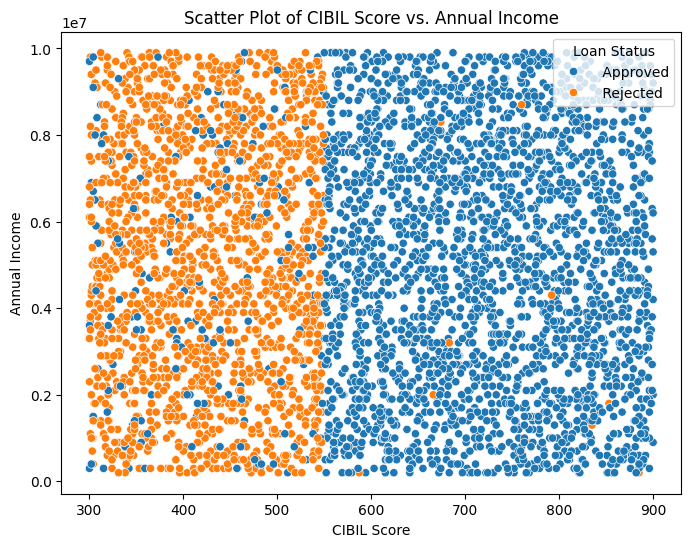

In [ ]:
# CIBIL score vs annual income on loan status
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='cibil_score', y='income_annum', hue='loan_status')
plt.title('Scatter Plot of CIBIL Score vs. Annual Income')
plt.xlabel('CIBIL Score')
plt.ylabel('Annual Income')
plt.legend(title='Loan Status')
plt.show()

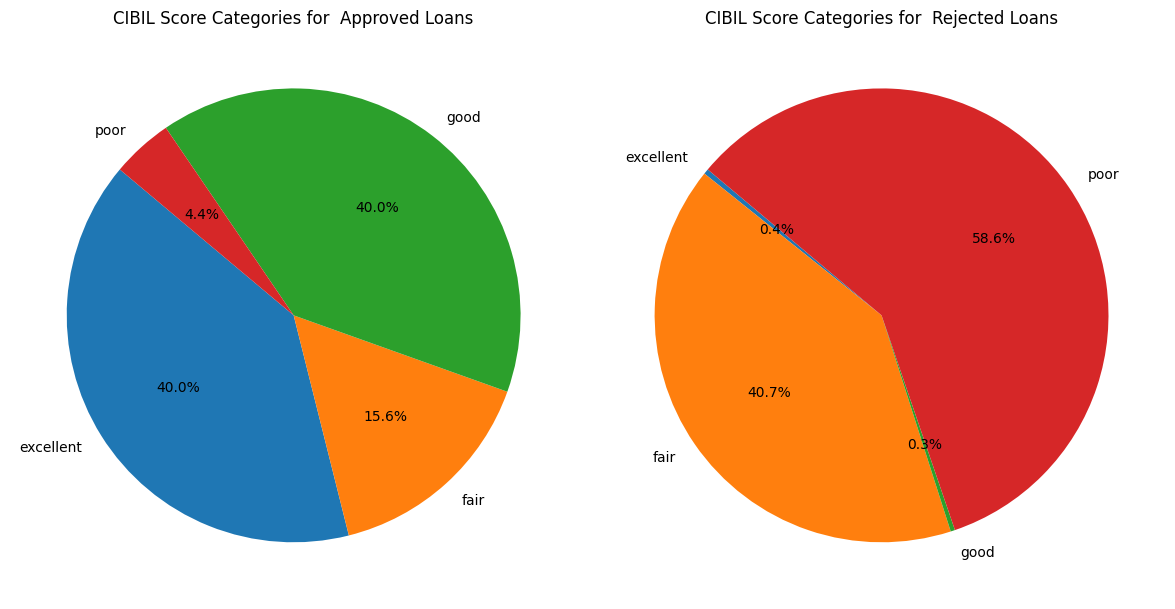

In [ ]:
# Further visualization of CIBIL score on loan status
counts = df.groupby(['loan_status', 'cibil_score_category']).size().unstack()
plt.figure(figsize=(12, 6))
for i, var in enumerate(counts.index, start=1):
    plt.subplot(1, 2, i)
    plt.pie(counts.loc[var], labels=counts.columns, autopct='%1.1f%%', startangle=140)
    plt.title('CIBIL Score Categories for ' + var + ' Loans')

plt.tight_layout()
plt.show()

Insights:
The scatter is a very clear visual relationship between CIBIL score and loan status, with a drastic difference in approval rates above a CIBIL score of around 550. This appears much more significant than annual income on loan status so the pie charts give insight on different CIBIL status categories for both the approved and rejected group. These show clearly that the rejected group contained a vast majority (98.6%) of people with only poor or fair CIBIL scores compared to the accepted groups 20%. These two visualizations indicate that CIBIL score is a very important factor in receiving a loan.

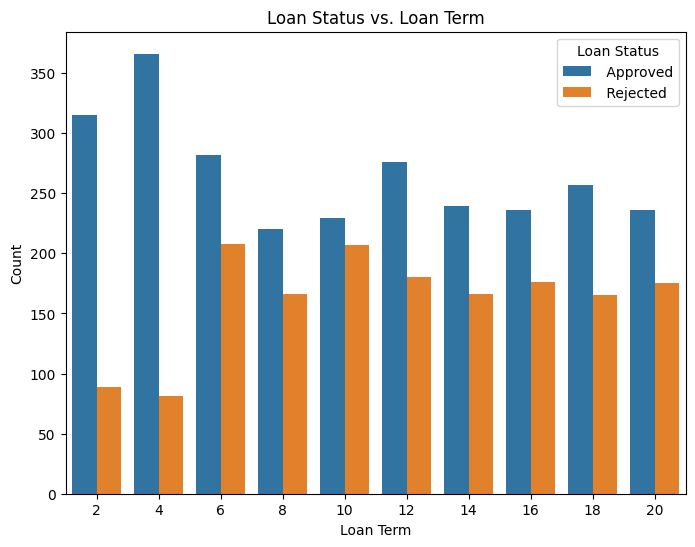

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loan_term', hue='loan_status')
plt.title('Loan Status vs. Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [ ]:
# Loan term on loan status
from scipy.stats import ttest_ind
approved_loan_term = df[df['loan_status'] == ' Approved']['loan_term']
denied_loan_term = df[df['loan_status'] == ' Rejected']['loan_term']
t_statistic, p_value = ttest_ind(approved_loan_term, denied_loan_term)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -7.431383314524249
P-value: 1.2911854638274257e-13


Insights: There is a statistically significant relationship between loan term and loan status and we see that loans with a shorter term seem to have a higher likelihood of being accepted, especially between 1-4 years.

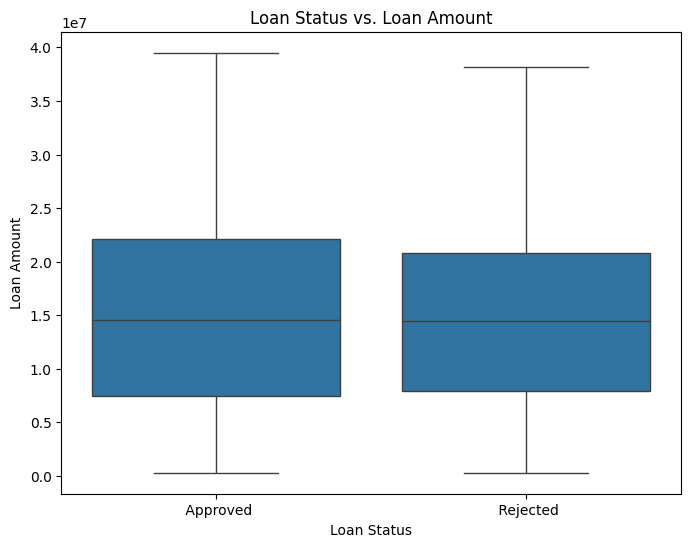

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='loan_status', y='loan_amount')
plt.title('Loan Status vs. Loan Amount')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

Insights:
There seems to be little discernable difference between loan amounts for loans that are approved versus rejected. Approved loans have a slightly larger interquartile range however.

So far we have seen through visualizations and chi-square tests that CIBIL score seems to have the largest effect on whether a loan is approved or rejected, though we have also seen factors such as loan term showing statistically significant relationships. Given that the relationships explored thus far have mostly been only between two variables, a logit regression will give more insight on how variables may interact.

In [ ]:
import statsmodels.api as sm
# converting units for simplicity:
df['income_annum_100k'] = df['income_annum'] / 100000
df['loan_amount_100k'] = df['loan_amount'] / 100000
df['total_assets_value_100k'] = df['total_assets_value'] / 100000
X = df[['no_of_dependents', 'income_annum_100k', 'loan_amount_100k', 'loan_term', 'total_assets_value_100k', 'education_num', 'cibil_score']]
y = df['loan_status_num']
X = sm.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.220352
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        loan_status_num   No. Observations:                 4269
Model:                          Logit   Df Residuals:                     4261
Method:                           MLE   Df Model:                            7
Date:                Wed, 08 May 2024   Pseudo R-squ.:                  0.6676
Time:                        03:50:38   Log-Likelihood:                -940.68
converged:                       True   LL-Null:                       -2830.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -11.3744      0.434    -26.192      0.000     -12.226   

Insights: The logit regression displays that the statistically significant variables in influencing loan status approval are annual income, loan amount, loan term and CIBIL score. While most of the statistically significant variables only have small effects, the most actionable insight is that a one point increase in CIBIL score is associated with a 0.02% higher likelihood of receiving a loan.
When all variables control for one another, number of dependents, total assets value and education were statistically insignificant.

It is interesting also to note that the coefficient for annual income is negative, where a 100k increase in income is associated with a -0.05% decrease in likelihood of loan approval. It is possible that this is because very wealthy people might be perceived as riskier, as we saw almost no correlation between CIBIL score and annual income in our correlation matrix earlier.


In [ ]:
# Regression on loan amount variables for approved loans
approved_df = df[df['loan_status'] == ' Approved']
model = sm.OLS(approved_df['loan_amount_100k'], sm.add_constant(approved_df[['education_num', 'income_annum_100k', 'total_assets_value_100k','self_employed_num', 'cibil_score', 'loan_term']]))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       loan_amount_100k   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     2992.
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        03:50:38   Log-Likelihood:                -13060.
No. Observations:                2656   AIC:                         2.613e+04
Df Residuals:                    2649   BIC:                         2.618e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

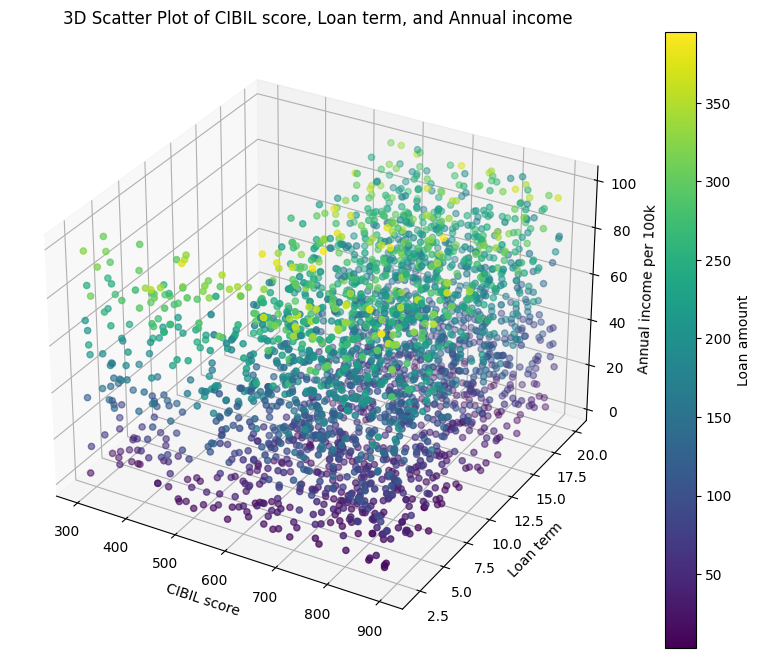

In [ ]:
# Types of approved loans: plot of statistically significant variables
fig2 = plt.figure(figsize=(10, 8))
ax2 = fig2.add_subplot(111, projection='3d')
scatter2 = ax2.scatter(approved_df['cibil_score'], approved_df['loan_term'], approved_df['income_annum_100k'], c=approved_df['loan_amount_100k'], cmap='viridis')
ax2.set_xlabel('CIBIL score')
ax2.set_ylabel('Loan term')
ax2.set_zlabel('Annual income per 100k')
ax2.set_title('3D Scatter Plot of CIBIL score, Loan term, and Annual income')
plt.colorbar(scatter2, label='Loan amount')
plt.show()

Insights:
For loans that have been approved, the OLS Regression displays that the only statistically significant variables in relation to loan amounts were loan terms, annual income and CIBIL scores. The 3D graph is a visualization to show how individuals seeking to receive higher loan amounts might focus on factors such as having higher annual income, higher CIBIL scores and smaller loan terms.

##MACHINE LEARNING

Creating a predictive model to forecast future loan approvals trained on the available dataset:

Firstly using K Nearest-Neighbours because of its simplicity and ability to capture local patterns is valuable in loan prediction.

In [ ]:
# Train-test
from sklearn.model_selection import train_test_split
X = df.iloc[:, 13:21].drop(columns=['total_assets_value_std']) # our standardized variables
# removed total_bank_assets because it overlaps with our other variables
X['self_employed_num'] = df['self_employed_num'] #binary variables added separately bc don't need to be standardized
X['education_num'] = df['education_num']
X['cibil_score_std'] = df['cibil_score_std'] #adding standardized cibil score
Y=df['loan_status_num']
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=.2)
X.head()

# Finding optimal N:
from sklearn import metrics
error = list()
accuracy = list()
for k in range(1, 70):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    error.append(np.mean(y_pred != Y_test))
    accuracy.append(metrics.accuracy_score(Y_test, y_pred) )

# Error
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(error)+1), error, color='red', linestyle='dashed', marker='o',
         markersize=3)
plt.yticks(np.arange(0, 0.6, .05))
plt.xticks(np.arange(0, 70, 5))
plt.title('KNN:\nAverage Error by K Value', size=18)
plt.xlabel('K Value', size=16)
plt.ylabel('Mean Error', size=16)
plt.show()

# Accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(accuracy)+1), accuracy, color='blue', linestyle='dashed', marker='o',
         markersize=5)
plt.yticks(np.arange(.5, 0.9, .05))
plt.xticks(np.arange(0, 70, 5))
plt.title('KNN:\nAccuracy by K Value', size=18)
plt.xlabel('K Value', size=16)
plt.ylabel('Accuracy', size=16)
plt.show()


The above visualizations were to find the optimal N for the KNN. At around N=35 there seems to be a good balance of highest accuracy and lowest error.

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
my_classifier = KNeighborsClassifier(n_neighbors = 35)
my_classifier.fit(X_train, Y_train)
import sklearn.metrics as m
Y_hat = my_classifier.predict(X_test)
cm=m.confusion_matrix(Y_test, Y_hat)
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
m.accuracy_score(Y_test, Y_hat)

In [ ]:
print(metrics.classification_report(Y_test, y_pred))

The above heatmap and classification report display a visual and numerical representation of the KNN model's performance, with a 92% overall accuracy and high precision, recall and f1-score.

Implementing a linear regression model to help with isolating features' importance in the loan approval process:

In [ ]:
# Linear regression
from sklearn import linear_model
my_model=linear_model.LinearRegression()
my_model.fit(X_train, Y_train)
Y_hat1 = my_model.predict(X_test)
mse = m.mean_squared_error(Y_test, Y_hat1)
rsquared = m.r2_score(Y_test, Y_hat1)
print("MSE:",mse)
print("R^2:",rsquared)

# validation mean score
import numpy as np
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(my_model, X, Y,train_sizes= np.linspace(.1,1,10))
train_mean_score = np.mean(train_scores, axis=1)
train_std_score = np.std(train_scores, axis=1)
validation_mean_score = np.mean(validation_scores, axis=1)
validation_std_score = np.std(validation_scores, axis=1)
plt.plot(np.linspace(.1,1,10), train_mean_score)
plt.plot(np.linspace(.1,1,10), validation_mean_score)
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.show()
print(validation_mean_score)

Our linear regression model explains around 61.7% of the variance in outcomes and has an MSE of 0.091. Furthemore, the validation mean scores displaying the learning curve ranges from 0.585-0.596 indicating a stability in the model.

##Conclusion

The data helps to shed some crucial insight into the inputs that help determine the success of loan applications. In specific, aspects of a candidate’s profile that contribute to successful loan approvals include:

- High CIBIL score
- High loan amount
- Shorter loan term
- Lower annual income

Of the above, CIBIL score is by far the most pivotal factor, due to its indication to lenders of an individuals credit history and therefore the risk associated with a loan. A high loan amount may be associated with higher likelihood due to higher profitability for lenders from interest and the possibility of collateral. Shorter loan terms may be less risky for lenders as they limit the possibility of a lender defaulting to a shorter period. Finally, a lower annual income might be associated with higher likelihood of loan approval as we saw that there was no correlation to CIBIL scores and so higher income individuals might be more risky borrowers.

For higher loan amounts (within approval group):

- High CIBIL score
- Shorter loan terms
- High annual income

Within the approved loans, higher loans were shown to be more likely awarded to candidates with the above characteristics. Again, the most pivotal feature was high CIBIL score due to its inherently lower risk for lenders. Given a higher average CIBIL score, if individuals also had higher incomes this might indicate lower risk to a lender. Finally, in addition to the aforementioned benefits of shorter loan terms they also might allow for faster equity build up for lenders and so were associated with a higher total loan amount received.